# Project Python Big Data

<b>Lakukan import library yang dibutuhkan </b>


## Sumber Data
<b>https://www.bps.go.id/indicator/12/1412/1/persentase-anak-yang-memiliki-akta-kelahiran-menurut-provinsi.html</b>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

<b>Baca Data dari file Persentase anak yang memiliki akta kelahiran</b>

In [2]:
data_persentase = pd.read_csv('Persentase_anak_yang_memiliki_akta_kelahiran_Menurut_Provinsi.csv')
display(data_persentase)

,Provinsi,2018,2019,2020
0,ACEH,87.85,91.22,93.84
1,SUMATERA UTARA,72.29,76.81,80.45
2,SUMATERA BARAT,85.35,87.89,90.10
3,RIAU,76.78,78.32,81.83
4,JAMBI,90.95,91.92,93.73
5,SUMATERA SELATAN,88.82,88.65,90.65
6,BENGKULU,90.66,91.85,92.77
7,LAMPUNG,88.14,90.23,91.65
8,KEP. BANGKA BELITUNG,95.12,94.60,96.07
9,KEP. RIAU,92.95,93.53,94.71


<b>Menambah kolom Pulau</b>

In [3]:
data_persentase['Pulau'] = ['Sumatera', 'Sumatera', 'Sumatera', 'Sumatera', 'Sumatera', 'Sumatera', 'Sumatera', 'Sumatera', 'Sumatera', 'Sumatera',
                            'Jawa', 'Jawa', 'Jawa', 'Jawa', 'Jawa', 'Jawa', 'Bali', 'Nusa Tenggara', 'Nusa Tenggara', 'Kalimantan', 'Kalimantan', 'Kalimantan', 'Kalimantan',
                            'Kalimantan', 'Sulawesi', 'Sulawesi', 'Sulawesi', 'Sulawesi', 'Sulawesi', 'Sulawesi', 'Maluku', 'Maluku', 'Papua', 'Papua', 
                            'Indonesia']

display(data_persentase)

,Provinsi,2018,2019,2020,Pulau
0,ACEH,87.85,91.22,93.84,Sumatera
1,SUMATERA UTARA,72.29,76.81,80.45,Sumatera
2,SUMATERA BARAT,85.35,87.89,90.10,Sumatera
3,RIAU,76.78,78.32,81.83,Sumatera
4,JAMBI,90.95,91.92,93.73,Sumatera
5,SUMATERA SELATAN,88.82,88.65,90.65,Sumatera
6,BENGKULU,90.66,91.85,92.77,Sumatera
7,LAMPUNG,88.14,90.23,91.65,Sumatera
8,KEP. BANGKA BELITUNG,95.12,94.60,96.07,Sumatera
9,KEP. RIAU,92.95,93.53,94.71,Sumatera


<b>GroupBy Pulau</b>

In [4]:
grup_pulau = data_persentase.groupby(['Pulau'], as_index = 0)
display(round(grup_pulau.mean(), 2))

,Pulau,2018,2019,2020
0,Bali,90.49,92.72,93.85
1,Indonesia,83.55,86.01,88.11
2,Jawa,88.60,90.54,92.05
3,Kalimantan,87.01,88.70,90.66
4,Maluku,74.78,78.93,81.56
5,Nusa Tenggara,68.91,71.40,74.16
6,Papua,53.54,60.46,63.88
7,Sulawesi,83.73,87.76,89.48
8,Sumatera,86.89,88.50,90.58


<b>Munculkan kolom Provinsi dari data persentase</b>

In [5]:
display(data_persentase['Provinsi'])

0                     ACEH
1           SUMATERA UTARA
2           SUMATERA BARAT
3                     RIAU
4                    JAMBI
5         SUMATERA SELATAN
6                 BENGKULU
7                  LAMPUNG
8     KEP. BANGKA BELITUNG
9                KEP. RIAU
10             DKI JAKARTA
11              JAWA BARAT
12             JAWA TENGAH
13           DI YOGYAKARTA
14              JAWA TIMUR
15                  BANTEN
16                    BALI
17     NUSA TENGGARA BARAT
18     NUSA TENGGARA TIMUR
19        KALIMANTAN BARAT
20       KALIMANTAN TENGAH
21      KALIMANTAN SELATAN
22        KALIMANTAN TIMUR
23        KALIMANTAN UTARA
24          SULAWESI UTARA
25         SULAWESI TENGAH
26        SULAWESI SELATAN
27       SULAWESI TENGGARA
28               GORONTALO
29          SULAWESI BARAT
30                  MALUKU
31            MALUKU UTARA
32             PAPUA BARAT
33                   PAPUA
34               INDONESIA
Name: Provinsi, dtype: object

<b>Munculkan kolom Provinsi dan 2018 </b>

In [6]:
display(data_persentase[['Provinsi', '2018']])

,Provinsi,2018
0,ACEH,87.85
1,SUMATERA UTARA,72.29
2,SUMATERA BARAT,85.35
3,RIAU,76.78
4,JAMBI,90.95
5,SUMATERA SELATAN,88.82
6,BENGKULU,90.66
7,LAMPUNG,88.14
8,KEP. BANGKA BELITUNG,95.12
9,KEP. RIAU,92.95


<b>Munculkan kolom Provinsi dan 2019 </b>

In [7]:
display(data_persentase[['Provinsi', '2019']])

,Provinsi,2019
0,ACEH,91.22
1,SUMATERA UTARA,76.81
2,SUMATERA BARAT,87.89
3,RIAU,78.32
4,JAMBI,91.92
5,SUMATERA SELATAN,88.65
6,BENGKULU,91.85
7,LAMPUNG,90.23
8,KEP. BANGKA BELITUNG,94.60
9,KEP. RIAU,93.53


<b>Munculkan kolom Provinsi dan 2020 </b>

In [8]:
display(data_persentase[['Provinsi', '2020']])

,Provinsi,2020
0,ACEH,93.84
1,SUMATERA UTARA,80.45
2,SUMATERA BARAT,90.10
3,RIAU,81.83
4,JAMBI,93.73
5,SUMATERA SELATAN,90.65
6,BENGKULU,92.77
7,LAMPUNG,91.65
8,KEP. BANGKA BELITUNG,96.07
9,KEP. RIAU,94.71


<b>Munculkan data persentase yang nama Provinsi-nya diawali dengan huruf S</b>

In [9]:
seleksi = data_persentase['Provinsi'].str.startswith('S')

display(data_persentase[seleksi])

,Provinsi,2018,2019,2020,Pulau
1,SUMATERA UTARA,72.29,76.81,80.45,Sumatera
2,SUMATERA BARAT,85.35,87.89,90.10,Sumatera
5,SUMATERA SELATAN,88.82,88.65,90.65,Sumatera
24,SULAWESI UTARA,85.45,88.97,91.00,Sulawesi
25,SULAWESI TENGAH,73.69,78.02,83.37,Sulawesi
26,SULAWESI SELATAN,87.04,89.35,91.06,Sulawesi
27,SULAWESI TENGGARA,81.47,88.12,88.58,Sulawesi
29,SULAWESI BARAT,84.63,89.11,89.56,Sulawesi


<b>Urutkan data Persentase secara descending</b>

In [10]:
display(data_persentase.sort_values(by = 'Provinsi', ascending = 0))

,Provinsi,2018,2019,2020,Pulau
1,SUMATERA UTARA,72.29,76.81,80.45,Sumatera
5,SUMATERA SELATAN,88.82,88.65,90.65,Sumatera
2,SUMATERA BARAT,85.35,87.89,90.10,Sumatera
24,SULAWESI UTARA,85.45,88.97,91.00,Sulawesi
27,SULAWESI TENGGARA,81.47,88.12,88.58,Sulawesi
25,SULAWESI TENGAH,73.69,78.02,83.37,Sulawesi
26,SULAWESI SELATAN,87.04,89.35,91.06,Sulawesi
29,SULAWESI BARAT,84.63,89.11,89.56,Sulawesi
3,RIAU,76.78,78.32,81.83,Sumatera
32,PAPUA BARAT,70.75,75.05,77.36,Papua


<b>Munculkan 5 data awal dan 5 data akhir di dataframe</b>

In [11]:
display(data_persentase.head())

display(data_persentase.tail())

,Provinsi,2018,2019,2020,Pulau
0,ACEH,87.85,91.22,93.84,Sumatera
1,SUMATERA UTARA,72.29,76.81,80.45,Sumatera
2,SUMATERA BARAT,85.35,87.89,90.10,Sumatera
3,RIAU,76.78,78.32,81.83,Sumatera
4,JAMBI,90.95,91.92,93.73,Sumatera


,Provinsi,2018,2019,2020,Pulau
30,MALUKU,73.59,78.66,80.04,Maluku
31,MALUKU UTARA,75.98,79.20,83.08,Maluku
32,PAPUA BARAT,70.75,75.05,77.36,Papua
33,PAPUA,36.32,45.88,50.40,Papua
34,INDONESIA,83.55,86.01,88.11,Indonesia


<b>Munculkan data provinsi dengan presentase akta kelahiran terbanyak pada tahun 2018<b>

In [12]:
seleksi = data_persentase['2018'] == data_persentase['2018'].max()

display(data_persentase[seleksi])

,Provinsi,2018,2019,2020,Pulau
13,DI YOGYAKARTA,97.4,97.95,98.36,Jawa


<b>Munculkan data provinsi dengan presentase akta kelahiran terbanyak pada tahun 2019<b>

In [13]:
seleksi = data_persentase['2019'] == data_persentase['2019'].max()

display(data_persentase[seleksi])

,Provinsi,2018,2019,2020,Pulau
13,DI YOGYAKARTA,97.4,97.95,98.36,Jawa


<b>Munculkan data provinsi dengan presentase akta kelahiran terbanyak pada tahun 2020<b>

In [14]:
seleksi = data_persentase['2020'] == data_persentase['2020'].max()

display(data_persentase[seleksi])

,Provinsi,2018,2019,2020,Pulau
13,DI YOGYAKARTA,97.4,97.95,98.36,Jawa


<b>Buat 2 buah Dataframe dengan nama ``data_presentase_terbanyak`` dan ``data_presentase_terkecil`` yang berisikan 5 data dengan presentase kepemilikan akta terbanyak dan terkecil dari data presentase<b>

In [15]:
df_presentase_terbanyak = data_persentase.nlargest(5, '2020')
print()

df_presentase_terkecil = data_persentase.nsmallest(5, '2020')

display(df_presentase_terbanyak)
display(df_presentase_terkecil)

,Provinsi,2018,2019,2020,Pulau
13,DI YOGYAKARTA,97.40,97.95,98.36,Jawa
10,DKI JAKARTA,96.23,97.01,97.52,Jawa
12,JAWA TENGAH,93.84,95.12,96.26,Jawa
8,KEP. BANGKA BELITUNG,95.12,94.60,96.07,Sumatera
9,KEP. RIAU,92.95,93.53,94.71,Sumatera


,Provinsi,2018,2019,2020,Pulau
33,PAPUA,36.32,45.88,50.40,Papua
18,NUSA TENGGARA TIMUR,58.17,61.08,63.33,Nusa Tenggara
32,PAPUA BARAT,70.75,75.05,77.36,Papua
30,MALUKU,73.59,78.66,80.04,Maluku
1,SUMATERA UTARA,72.29,76.81,80.45,Sumatera


<b>Munculkan rata-rata persentase akta kelahiran setiap provinsi dan rata-rata persentase per tahun</b>

In [16]:
df_mean_provinsi = (data_persentase['2018'] + data_persentase['2019'] + data_persentase['2020']) // 3
df_mean_2018 = round(data_persentase['2018'].mean(), 2)
df_mean_2019 = round(data_persentase['2019'].mean(), 2)
df_mean_2020 = round(data_persentase['2020'].mean(), 2)

data_persentase['rata-rata'] = df_mean_provinsi
#data_persentase.loc[len(data_persentase.index)] = ['Total', df_mean_2018, df_mean_2019, df_mean_2020, '']
display(data_persentase)


,Provinsi,2018,2019,2020,Pulau,rata-rata
0,ACEH,87.85,91.22,93.84,Sumatera,90.0
1,SUMATERA UTARA,72.29,76.81,80.45,Sumatera,76.0
2,SUMATERA BARAT,85.35,87.89,90.10,Sumatera,87.0
3,RIAU,76.78,78.32,81.83,Sumatera,78.0
4,JAMBI,90.95,91.92,93.73,Sumatera,92.0
5,SUMATERA SELATAN,88.82,88.65,90.65,Sumatera,89.0
6,BENGKULU,90.66,91.85,92.77,Sumatera,91.0
7,LAMPUNG,88.14,90.23,91.65,Sumatera,90.0
8,KEP. BANGKA BELITUNG,95.12,94.60,96.07,Sumatera,95.0
9,KEP. RIAU,92.95,93.53,94.71,Sumatera,93.0


<b>Munculkan data provinsi dengan presentase akta kelahiran terbanyak 2018-2020<b>

In [17]:
seleksi = data_persentase['rata-rata'] == data_persentase['rata-rata'].max()

display(data_persentase[seleksi])

,Provinsi,2018,2019,2020,Pulau,rata-rata
13,DI YOGYAKARTA,97.4,97.95,98.36,Jawa,97.0


<b>Munculkan data statistik dari semua kolom</b>

In [18]:
display( round( data_persentase.describe(include='all').fillna(value='-'), 2 ) )

,Provinsi,2018,2019,2020,Pulau,rata-rata
count,35,35.0,35.0,35.0,35,35.0
unique,35,-,-,-,9,-
top,ACEH,-,-,-,Sumatera,-
freq,1,-,-,-,10,-
mean,-,83.040286,85.676571,87.697714,-,84.942857
std,-,11.688049,10.213862,9.44596,-,10.41476
min,-,36.32,45.88,50.4,-,44.0
25%,-,78.215,81.085,84.175,-,80.5
50%,-,85.45,88.97,90.65,-,88.0
75%,-,90.285,91.885,93.35,-,91.5


<b>Melakukan rata-rata kenaikan persentase dari data 2018-2019</b>

In [23]:
#field rata kenaikan
df_pertumbuhan = ((data_persentase['2019'] - data_persentase['2018']) + (data_persentase['2020'] - data_persentase['2019'])) / 2
data_persentase['rata rata kenaikan'] = df_pertumbuhan

#field rata rata
df_mean_provinsi = (data_persentase['2018'] + data_persentase['2019'] + data_persentase['2020']) // 3
df_mean_2018 = round(data_persentase['2018'].mean(), 2)
df_mean_2019 = round(data_persentase['2019'].mean(), 2)
df_mean_2020 = round(data_persentase['2020'].mean(), 2)
data_persentase['rata-rata'] = df_mean_provinsi

display(data_persentase)

,Provinsi,2018,2019,2020,Pulau,rata-rata,rata rata kenaikan
0,ACEH,87.85,91.22,93.84,Sumatera,90.0,2.995
1,SUMATERA UTARA,72.29,76.81,80.45,Sumatera,76.0,4.080
2,SUMATERA BARAT,85.35,87.89,90.10,Sumatera,87.0,2.375
3,RIAU,76.78,78.32,81.83,Sumatera,78.0,2.525
4,JAMBI,90.95,91.92,93.73,Sumatera,92.0,1.390
5,SUMATERA SELATAN,88.82,88.65,90.65,Sumatera,89.0,0.915
6,BENGKULU,90.66,91.85,92.77,Sumatera,91.0,1.055
7,LAMPUNG,88.14,90.23,91.65,Sumatera,90.0,1.755
8,KEP. BANGKA BELITUNG,95.12,94.60,96.07,Sumatera,95.0,0.475
9,KEP. RIAU,92.95,93.53,94.71,Sumatera,93.0,0.880


<b>Memvisualisasikan data menggunakan Plotting line pada seluruh data di seluruh kolom<b>

<AxesSubplot:>

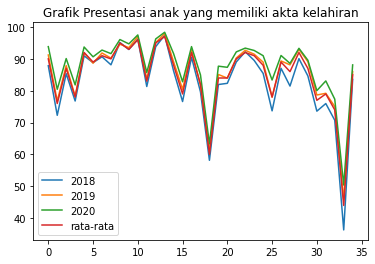

In [19]:
display(data_persentase.plot(kind='line'))
plt.title('Grafik Presentasi anak yang memiliki akta kelahiran')
plt.show()

<b> Melakukan visualisasi plotting line pada kolom 2018 dan 2020 <b>

<AxesSubplot:>

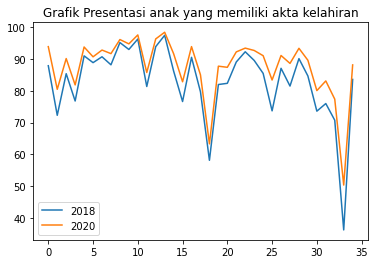

In [20]:
display(data_persentase[['2018', '2020']].plot(kind='line'))
plt.title('Grafik Presentasi anak yang memiliki akta kelahiran')
plt.show()

<b>Memvisualisasikan data menggunakan plotting bar pada setiap kolom<b>

<AxesSubplot:>

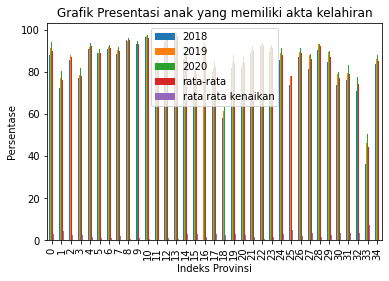

In [34]:
display(data_persentase.plot(kind ='bar'))

plt.title('Grafik Presentasi anak yang memiliki akta kelahiran')
#plt.bar(data_persentase])
plt.xlabel('Indeks Provinsi')
plt.ylabel('Persentase')
plt.show()

<b>Munculkan visualisasi rata-rata persentase setiap provinsi dari tahun 2018 sampai 2020</b>

<AxesSubplot:>

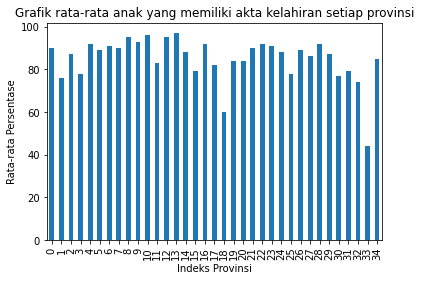

In [43]:
display(df_mean_provinsi.plot(kind='bar', label='2018-2020'))

#provinsi = data_persentase['Provinsi'].unique()
#plt.bar(provinsi, df_mean_provinsi(label = 2018-2019))
plt.title('Grafik rata-rata anak yang memiliki akta kelahiran setiap provinsi')
#plt.xticks(provinsi, rotation = 'vertical', size = 8)
plt.xlabel('Indeks Provinsi')
plt.ylabel('Rata-rata Persentase')
plt.show()

<b>Menampilkan data dengan scatter</b>

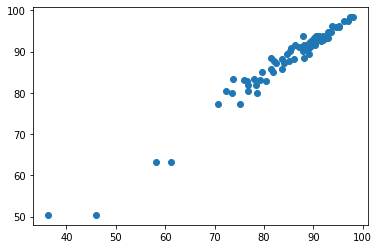

In [81]:
plt.scatter(data_persentase[['2018','2019']], data_persentase[['2020','2020']])
plt.show()

<b>Melakukan prediksi untuk tahun selanjut nya menggunakan regresi linear</b>

In [82]:
#input 
tahun2018 = float(input("masukan presentase 2 tahun sebelumnya "))
tahun2019 = float(input("masukan presentase 1 tahun sebelumnya "))

#pembuatan data train dan test
X = data_persentase[['2018','2019']]
y = data_persentase['2020']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=20, random_state=45)


model=LinearRegression()

model.fit(X_train, y_train)
model.predict(X_test)
errors = np.sqrt(mean_squared_error(y_test,model.predict(X_test)))
predictions = model.predict([[tahun2018,tahun2019]])[0]


print("Hasil Prediksi",format(float("%.2f" %predictions)))
print("Range perkiraan hasil prediksi",format("%.2f" %float(predictions-errors),"%.2f" %float(predictions+errors)))
print("Korelasi",format(float(errors)))
print("kolom 2018 dan 2019", int(errors *100),"Persen mempengaruhi kolom 2020")
    

Hasil Prediksi 57.74
Range perkiraan hasil prediksi 56.75                                                     
Korelasi 0.9880569778232038
kolom 2018 dan 2019 98 Persen mempengaruhi kolom 2020
